In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import csv
import cv2
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [5]:
with_mask_train_dir = os.path.join('data/train/with_mask_train/')
without_mask_train_dir = os.path.join('data/train/without_mask_train/')
with_mask_test_dir = os.path.join('data/validation/with_mask_test/')
without_mask_test_dir = os.path.join('data/validation/without_mask_test/')

#with_mask_train_names = os.listdir(with_mask_train_dir)
#print(with_mask_train_names[:10])

print('total training with_mask images:', len(os.listdir(with_mask_train_dir)))
print('total training without_mask images:', len(os.listdir(without_mask_train_dir)))
print('total validation with_mask images:', len(os.listdir(with_mask_test_dir)))
print('total validation without_mask images:', len(os.listdir(without_mask_test_dir)))

total training with_mask images: 641
total training without_mask images: 637
total validation with_mask images: 50
total validation without_mask images: 50


In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'data/train/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'data/validation/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1276 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 78s 8s/step - loss: 0.8013 - acc: 0.5862 - val_loss: 2.2441 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 72s 7s/step - loss: 0.7230 - acc: 0.7539 - val_loss: 0.3129 - val_acc: 0.9300
Epoch 3/10
10/10 [==============================] - 94s 9s/step - loss: 0.2231 - acc: 0.9240 - val_loss: 0.2073 - val_acc: 0.9500
Epoch 4/10
10/10 [==============================] - 75s 8s/step - loss: 0.2750 - acc: 0.8981 - val_loss: 0.1353 - val_acc: 0.9400
Epoch 5/10
10/10 [==============================] - 73s 7s/step - loss: 0.2016 - acc: 0.9412 - val_loss: 0.1888 - val_acc: 0.9400
Epoch 6/10
10/10 [==============================] - 67s 7s/step - loss: 0.0794 - acc: 0.9781 - val_loss: 0.1177 - val_acc: 0.9600
Epoch 7/10
10/10 [==============================] - 72s 7s/step - loss: 0.4092 - acc: 0.9044 - val_loss: 0.1466 - val_acc: 0.9600
Epoch 8/10
10/10 [========================

<Figure size 432x288 with 0 Axes>

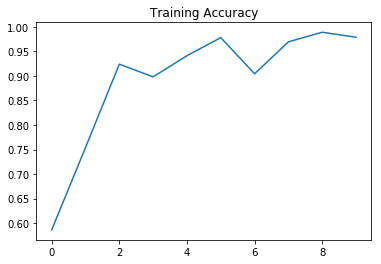

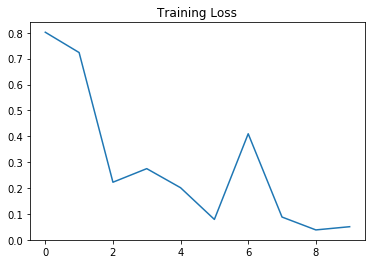

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('Training Accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.title('Training Loss')
plt.figure()

In [11]:
model.save('face_mask_model.h5')